In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

import matplotlib.pyplot as plt
import tikzplotlib
import pylab
from mpl_toolkits.mplot3d import Axes3D

In [18]:
# Construct model
model = Sequential()
model.add(Dense(100, input_shape=[2,], activation='selu'))
model.add(Dense(100, activation='selu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dense(100, activation='selu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dense(100, activation='selu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dense(100, activation='selu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dense(100, activation='selu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dense(1))
# model.trainable_weights


In [20]:
def theta2cart(theta_out, r): # converts random thetas and fixed r into x and y coordinates
    x_out = tf.math.scalar_mul(r, tf.math.cos(theta_out)) # x = 4cos(theta_in)
    y_out = tf.math.scalar_mul(r, tf.math.sin(theta_out)) # y = 4sin(theta_in)
    
    out_bnd_pts = tf.transpose(tf.stack([x_out,y_out],0))
    return out_bnd_pts

In [4]:
def out_bnd_fn(theta_out): # f(4,theta) = 4sin(5theta)
    f_true = tf.transpose(tf.math.scalar_mul(4, tf.math.sin(tf.math.scalar_mul(5,theta_out))))
    return f_true

In [21]:
def loss_fn(f_pred, theta_out): # loss_fn(model, [x,y], [theta_in], [theta_out])
#     f_pred = tf.squeeze(f_pred)
#     print("f_pred shape" ,tf.shape(f_pred))

# Find loss for outer boundary points #####################################################################
    f_true =  out_bnd_fn(theta_out)
#     f_true = tf.squeeze(f_true)
#     print("t_true shape", tf.shape(f_true))
#     print(tf.shape(trainable_weights))
#     regulizer = tf.nn.l2_loss(trainable_weights)
# out_bnd_err = f(x,y)-4sin(5theta)

    loss = tf.keras.metrics.mean_squared_error(f_true,f_pred) # MSE outer bound points
    return loss

In [22]:
# Train network
def train_for():
    #Ftrl
    #Adam BAD
    #SGD BAD
    #Nadam BAD

# Define training parameters ##############################################################################    
    optimizer = tf.keras.optimizers.Ftrl(learning_rate=0.1) # Fancy gradient decent
    epochs = 20
    train_loss_results = [] # For tracking loss during training
    iterations_per_epoch = 100

    theta_out_size = 100 # Number of outer boundary points to sample each iteration

    for epoch in range(epochs):
        epoch_loss_avg = tf.keras.metrics.Mean()
        
        for iteration in range(iterations_per_epoch):
    
# Sample outer bound thetas ###############################################################################
            theta_out = tf.random.uniform([1,theta_out_size], minval=0, maxval=2*np.pi)
            out_bnd_pts = theta2cart(theta_out,4)
            
# Optimize the network with respect to hyperparameters ####################################################
            
            with tf.GradientTape() as t:
                f_pred = model(out_bnd_pts, training=True)
                loss = loss_fn(f_pred, theta_out) # Loss
            grads = t.gradient(loss, model.trainable_weights) # Find model gradients
            optimizer.apply_gradients(zip(grads, model.trainable_weights)) # Perform gradient decent
            epoch_loss_avg.update_state(loss) # Track loss
            #optimizer.minimize(loss_fn(model, theta_out), model.trainable_weights)
            # End training iteration
        train_loss_results.append(epoch_loss_avg.result())
        
        if epoch % 1 == 0:
            print("Epoch {:03d}: Loss: {:.3f}".format(epoch, epoch_loss_avg.result()))
        # End Epoch

In [23]:
train_for()

Epoch 000: Loss: 250676.422
Epoch 001: Loss: 4.581
Epoch 002: Loss: 2.019
Epoch 003: Loss: 0.992
Epoch 004: Loss: 0.668
Epoch 005: Loss: 1.108
Epoch 006: Loss: 0.888
Epoch 007: Loss: 0.287
Epoch 008: Loss: 0.800
Epoch 009: Loss: 0.197
Epoch 010: Loss: 0.185
Epoch 011: Loss: 0.143
Epoch 012: Loss: 0.130
Epoch 013: Loss: 0.121
Epoch 014: Loss: 0.106
Epoch 015: Loss: 0.100
Epoch 016: Loss: 0.096
Epoch 017: Loss: 0.086
Epoch 018: Loss: 0.086
Epoch 019: Loss: 0.085


In [24]:
# Generate test points to plot ############################################################################
out_bnd_pts_size = 1000 # Number of outer boundary points to sample 

# Sample outer boundary points ############################################################################
theta_out = tf.random.uniform([1, out_bnd_pts_size], minval=0, maxval=2*np.pi)
test_pts = theta2cart(theta_out,4)
# print(test_pts)
print("test_pts shape",tf.shape(test_pts))

z_pred = model(test_pts)
print("z_pred shape", tf.shape(z_pred))

z = out_bnd_fn(theta_out)
print("z shape",tf.shape(z))


test_pts shape tf.Tensor([1000    1    2], shape=(3,), dtype=int32)
z_pred shape tf.Tensor([1000    1], shape=(2,), dtype=int32)
z shape tf.Tensor([1000    1], shape=(2,), dtype=int32)


(1000,)
(1000,)
(1000,)


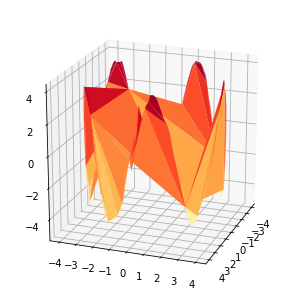

In [26]:
# Plot ####################################################################################################
fig = pylab.figure(figsize=plt.figaspect(1))
ax = Axes3D(fig)

X = test_pts[0:, 0, 0].numpy()
print(X.shape)
Y = test_pts[0:, 0, 1].numpy()
print(Y.shape)
Z = z_pred[0:, 0].numpy()
print(Z.shape)

ax.plot_trisurf(X,Y,Z, cmap=plt.cm.YlOrRd)
ax.view_init(20, 20)
plt.show()

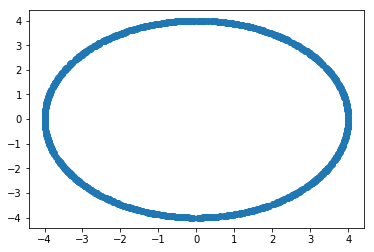

In [27]:
plt.scatter(X,Y)
plt.show()